# **Chronic Kidney Disease Prediction**
Problem statement - Using the dataset given build a model to predict whether a person has Chronic Kidney disease or not.

###**Importing the required libraries**

In [ ]:
#importing all the necessary Libraries

import glob 
from keras.models import Sequential, load_model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import keras as k


## **Loading the Data**

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/DataSets for Analysis/kidney_disease.csv")
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
df.shape

(400, 26)

## **Data Cleaning**

In [ ]:
# Create list of Column names to keep
columns_to_retain = ['age','bp','sg','al','sc','hemo','pcv','wc','rbc',
                     'htn','classification']

# Columns to drop that are not in columns_to_retain
df=  df.drop([col for col in df.columns if not col in columns_to_retain ],
             axis = 1)

#Drop the rows with na or missing values
df = df.dropna(axis=0)


In [ ]:
df.head()

,age,bp,sg,al,rbc,sc,hemo,pcv,wc,htn,classification
2,62.0,80.0,1.010,2.0,normal,1.8,9.6,31,7500,no,ckd
3,48.0,70.0,1.005,4.0,normal,3.8,11.2,32,6700,yes,ckd
4,51.0,80.0,1.010,2.0,normal,1.4,11.6,35,7300,no,ckd
8,52.0,100.0,1.015,3.0,normal,1.9,10.8,33,9600,yes,ckd
9,53.0,90.0,1.020,2.0,abnormal,7.2,9.5,29,12100,yes,ckd


In [ ]:
df.shape

(189, 11)

## **Data Transformation by Label Encoder**

In [ ]:
# Transforming non numeric data in the columns

for column in df.columns:
    if df[column].dtype == np.number:
        continue
    df[column] = LabelEncoder().fit_transform(df[column])
    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  after removing the cwd from sys.path.


In [ ]:
# printing the dataset

df.head()

,age,bp,sg,al,rbc,sc,hemo,pcv,wc,htn,classification
2,62.0,80.0,1.010,2.0,1,1.8,9.6,12,60,0,0
3,48.0,70.0,1.005,4.0,1,3.8,11.2,13,52,1,0
4,51.0,80.0,1.010,2.0,1,1.4,11.6,16,58,0,0
8,52.0,100.0,1.015,3.0,1,1.9,10.8,14,77,1,0
9,53.0,90.0,1.020,2.0,0,7.2,9.5,10,13,1,0


## **Splitting the dataset to Features and Target**

In [ ]:
# Split the data into independent(X)Features and dependent variables(y)Target

X = df.drop(['classification'],axis = 1)

y = df['classification']




##**Feature Scaling**

In [ ]:
# Feature Scaling 
# We use Min-Max Scaler----Scales all data within 0 and 1

x_scaler = MinMaxScaler()

x_scaler.fit(X)
column_names = X.columns
X[column_names] = x_scaler.transform(X)


## **Splitting the dataset to train and test data**

In [ ]:
# Split the data as train(80%) and test(20%) dataset

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,
                                                 shuffle = True)


## **Model Building**

<br>

### **Model 1 =  Artificial Neural Network**

In [ ]:
# Building the model 
model = Sequential()
model.add( Dense(256,input_dim = len(X.columns),
                 kernel_initializer=k.initializers.random_normal(seed=13),
                 activation = 'relu'))
model.add( Dense(1, activation= "hard_sigmoid"))




In [ ]:
# Compiling the model
model.compile(loss = 'binary_crossentropy',optimizer='adam',
              metrics=['accuracy'])


In [ ]:
# Train the model

history = model.fit(X_train,y_train, epochs = 1000,
                    batch_size = X_train.shape[0] )


Epoch 1/1000
1/1 [==============================] - 1s 544ms/step - loss: 0.6990 - accuracy: 0.3709
Epoch 2/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.6837 - accuracy: 0.6887
Epoch 3/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.6692 - accuracy: 0.9073
Epoch 4/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.6553 - accuracy: 0.9205
Epoch 5/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.6421 - accuracy: 0.8874
Epoch 6/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.6295 - accuracy: 0.8543
Epoch 7/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.6174 - accuracy: 0.8344
Epoch 8/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.6058 - accuracy: 0.8344
Epoch 9/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.5945 - accuracy: 0.8212
Epoch 10/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.5836 - accuracy: 0.8079
Epoch 11/1000
1/

In [ ]:
# Save the model

model.save('kid.model')


INFO:tensorflow:Assets written to: kid.model/assets


###**Visualising the loss and accuracy of training the model** 

Text(0.5, 0, 'epoch')

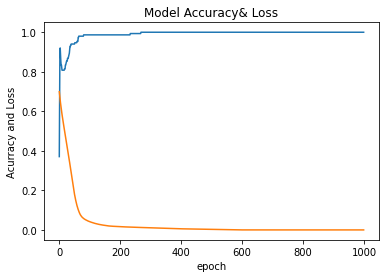

In [ ]:
# Visualise the model for loss and accuracy while training the model

plt.plot(history.history["accuracy"])
plt.plot(history.history['loss'])
plt.title('Model Accuracy& Loss')
plt.ylabel('Acurracy and Loss')
plt.xlabel('epoch')


In [ ]:
print('Shape of train data : ', X_train.shape)
print('Shape of test data : ', X_test.shape)

Shape of train data :  (151, 10)
Shape of test data :  (38, 10)


In [ ]:
# Show the actual and predicted values
pred = model.predict(X_test)
pred = [1 if y >=0.5 else 0 for y in pred]

print('Original : {} '.format(', '.join(str(x) for x in y_test)))

print('Predicted : {} '.format(', '.join(str(x) for x in pred )))

Original : 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1 
Predicted : 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1 


In [ ]:
# Show the actual Values
y_test

128    0
337    1
335    1
398    1
263    1
360    1
40     0
256    1
378    1
181    0
304    1
76     0
284    1
71     0
173    0
275    1
395    1
285    1
311    1
144    0
331    1
11     0
387    1
20     0
267    1
213    0
291    1
382    1
356    1
254    1
353    1
300    1
385    1
278    1
347    1
303    1
336    1
375    1
Name: classification, dtype: int64

### **Model 2 = Logistic Regression**

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
import joblib
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
sm=SMOTE()
X_train, y_train =sm.fit_resample(X_train,y_train)
lr=LogisticRegression()
lr.fit(X_train,y_train)
a11=cross_validate(lr,X,y, cv=10)
print(a11)
joblib.dump(lr,"model_2")

{'fit_time': array([0.00522566, 0.00416541, 0.00626063, 0.00414133, 0.00437427,
       0.00415969, 0.00438952, 0.00457191, 0.00551224, 0.00418401]), 'score_time': array([0.00095677, 0.00075459, 0.00090432, 0.00081778, 0.00073099,
       0.00076461, 0.00138116, 0.00121617, 0.00122595, 0.00095463]), 'test_score': array([0.94736842, 1.        , 1.        , 1.        , 1.        ,
       0.94736842, 0.94736842, 0.94736842, 1.        , 1.        ])}


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


['model_2']

In [ ]:
pred = lr.predict(X_test)
pred

array([0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1])

In [ ]:
lr.score(X_test,y_test)

1.0

In [ ]:
# confusion matrix in sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

matrix = confusion_matrix(y_test,pred,labels=[1,0])
print('Confusion matrix : \n',matrix)

# classification report for precision, recall f1-score and accuracy
report = classification_report(y_test,pred,labels=[1,0])
print('Classification report : \n',report)

Confusion matrix : 
 [[26  0]
 [ 1 11]]
Classification report : 
               precision    recall  f1-score   support

           1       0.96      1.00      0.98        26
           0       1.00      0.92      0.96        12

    accuracy                           0.97        38
   macro avg       0.98      0.96      0.97        38
weighted avg       0.97      0.97      0.97        38

